In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

# Deliverable 3

## Read the cleaned CSV

In [4]:
# Load the data
file_path = Path('./data/clean_loans.csv')
df = pd.read_csv(file_path)
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,dti,delinq_2yrs,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,27.24,0.0,...,0.0,3.0,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,20.23,0.0,...,0.0,6.0,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,24.26,0.0,...,0.0,4.0,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,31.44,0.0,...,0.0,1.0,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,18.76,0.0,...,0.0,1.0,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0


# Split the Data into Training and Testing

In [5]:
# Create our features
X = df.drop(columns='loan_status')
X.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,27.24,0.0,0.0,...,0.0,3.0,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,20.23,0.0,0.0,...,0.0,6.0,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,24.26,0.0,0.0,...,0.0,4.0,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,31.44,0.0,1.0,...,0.0,1.0,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,18.76,0.0,1.0,...,0.0,1.0,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0


In [6]:
# Create our target
y = df['loan_status']

In [7]:
X.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,...,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.0,6.881700e+04,6.881700e+04,68817.000000,6.881700e+04
mean,16677.594562,0.127718,480.652863,8.821371e+04,21.778153,0.217766,0.497697,12.587340,0.126030,17604.142828,...,0.052138,2.219423,95.057627,30.626217,0.125972,0.0,2.100332e+05,6.133843e+04,29734.128558,5.572240e+04
std,10277.348590,0.048130,288.062432,1.155800e+05,20.199244,0.718367,0.758122,6.022869,0.336797,21835.880400,...,0.390633,1.897432,8.326426,33.631463,0.336732,0.0,1.928088e+05,5.738798e+04,26795.394232,5.095845e+04
min,1000.000000,0.060000,30.890000,4.000000e+01,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,20.000000,0.000000,0.000000,0.0,3.600000e+03,2.350000e+02,100.000000,1.270000e+02
25%,9000.000000,0.088100,265.730000,5.000000e+04,13.890000,0.000000,0.000000,8.000000,0.000000,6293.000000,...,0.000000,1.000000,93.000000,0.000000,0.000000,0.0,6.697700e+04,2.650300e+04,11600.000000,2.288000e+04
50%,15000.000000,0.118000,404.560000,7.300000e+04,19.760000,0.000000,0.000000,11.000000,0.000000,12068.000000,...,0.000000,2.000000,100.000000,20.000000,0.000000,0.0,1.467100e+05,4.535700e+04,22100.000000,4.200000e+04
75%,24000.000000,0.155700,648.100000,1.040000e+05,26.660000,0.000000,1.000000,16.000000,0.000000,21735.000000,...,0.000000,3.000000,100.000000,50.000000,0.000000,0.0,3.036400e+05,7.657000e+04,39300.000000,7.249900e+04
max,40000.000000,0.308400,1676.230000,8.797500e+06,999.000000,18.000000,5.000000,72.000000,4.000000,587191.000000,...,18.000000,19.000000,100.000000,100.000000,4.000000,0.0,3.292782e+06,1.295455e+06,509400.000000,1.426964e+06


In [8]:
# Check the balance of our target values
y.value_counts()

low_risk     68470
high_risk      347
Name: loan_status, dtype: int64

In [9]:
X.shape

(68817, 82)

In [10]:
X_encoded = pd.get_dummies(X)
X_encoded.shape

(68817, 92)

In [11]:
# standard scaling
data_scaler = StandardScaler()

In [12]:
# fit and transform X_encoded
X_encoded_scaled = data_scaler.fit_transform(X_encoded)
X_encoded_scaled[:1]

array([[-0.60109272,  0.91798436, -0.36555835, -0.1921948 ,  0.27040056,
        -0.30314253, -0.65649151, -0.76165917, -0.37420432, -0.73252183,
        -0.8658573 , -0.58124513, -0.58081958, -0.50046544, -0.50029335,
        -0.3228639 , -0.89960419, -0.03227363,  0.        ,  0.        ,
        -0.17383528, -0.12011247,  0.        ,  0.        , -0.00589695,
        -0.72692228,  1.67997825,  0.2392533 ,  1.19137226,  1.35299632,
        -0.80895603, -0.13418715, -0.45717571, -0.16310175, -0.24864022,
        -0.83203994,  0.12422197, -1.04213361, -0.24758239, -0.59166015,
         0.75578041,  0.37274923, -0.59052419, -0.80915288,  1.04494582,
        -0.07820908, -0.00778953, -0.56994022, -0.7981628 , -0.64845959,
        -0.66313947, -0.8249868 , -0.14674317, -1.10824038, -0.33490355,
        -1.13862411, -1.05103022, -1.27998521, -1.40011594,  0.06599699,
        -1.11347944, -1.31043257, -1.0519437 , -0.75930693,  0.        ,
         0.        , -0.13347217,  0.41138923, -1.1

In [13]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled, y, random_state=1)
y_train.value_counts()

low_risk     51366
high_risk      246
Name: loan_status, dtype: int64

In [14]:
# imbalance
print(246/51366)

0.004789160144842892


# Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble AdaBoost classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Print the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier onely, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [15]:
# Resample the training data with the BalancedRandomForestClassifier
# model fit predict

brf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)
y_pred

array(['low_risk', 'low_risk', 'low_risk', ..., 'low_risk', 'high_risk',
       'low_risk'], dtype=object)

In [16]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[   64,    37],
       [ 1980, 15124]], dtype=int64)

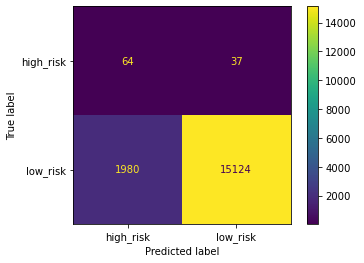

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = brf.classes_)
disp.plot()

In [18]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.7589504857875872

In [19]:
# Print the imbalanced classification report
# base              high_risk       0.81      0.21      1.00      0.33 
# random_oversample high_risk       0.03      0.82      0.84      0.06
# smote             high_risk       0.04      0.82      0.87      0.07
# undersample       high_risk       0.02      0.88      0.76      0.04
# smoteenn          high_risk       0.03      0.82      0.86      0.06
imb_report = classification_report_imbalanced(y_test, y_pred)
print(imb_report)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.03      0.63      0.88      0.06      0.75      0.55       101
   low_risk       1.00      0.88      0.63      0.94      0.75      0.57     17104

avg / total       0.99      0.88      0.64      0.93      0.75      0.57     17205



In [20]:
# List the features sorted in descending order by feature importance
imp = brf.feature_importances_
imp

array([0.01120352, 0.0290959 , 0.01874404, 0.01541187, 0.01787229,
       0.00345822, 0.00459808, 0.00782676, 0.00139708, 0.01323283,
       0.01189521, 0.01570446, 0.01814296, 0.06094328, 0.04802628,
       0.05309858, 0.06748531, 0.00627139, 0.        , 0.        ,
       0.06545229, 0.00043341, 0.        , 0.        , 0.00304815,
       0.01457898, 0.00751974, 0.00694371, 0.00402052, 0.00718284,
       0.01359687, 0.01366092, 0.01328209, 0.00356889, 0.00623413,
       0.01550991, 0.01376812, 0.01391798, 0.00713626, 0.00733491,
       0.00882735, 0.0085412 , 0.01424355, 0.01389816, 0.01132345,
       0.        , 0.        , 0.01226542, 0.01642373, 0.01226411,
       0.00967309, 0.00603908, 0.01359849, 0.02016882, 0.00265057,
       0.00692021, 0.00867622, 0.00596325, 0.00810271, 0.0117643 ,
       0.00991667, 0.01135774, 0.00697322, 0.00781255, 0.        ,
       0.        , 0.00109173, 0.00768545, 0.0123226 , 0.00617031,
       0.0016256 , 0.        , 0.0138726 , 0.01056484, 0.01464

In [21]:
sorted(zip(brf.feature_importances_, X.columns), reverse=True)

[(0.06748531007466424, 'out_prncp_inv'),
 (0.06545229058685709, 'total_rec_int'),
 (0.060943279696577715, 'total_acc'),
 (0.05309858490795048, 'out_prncp'),
 (0.04802628491752986, 'initial_list_status'),
 (0.029095900151283657, 'int_rate'),
 (0.020168820032067526, 'mo_sin_old_il_acct'),
 (0.018744036247994512, 'installment'),
 (0.0181429572889536, 'revol_bal'),
 (0.017872292952376093, 'annual_inc'),
 (0.01642372648663252, 'avg_cur_bal'),
 (0.01570446463260389, 'pub_rec'),
 (0.015509907090537707, 'open_il_24m'),
 (0.015411872975380447, 'home_ownership'),
 (0.014649375263340364, 'pct_tl_nvr_dlq'),
 (0.014578975451227246, 'next_pymnt_d'),
 (0.014243548511133424, 'all_util'),
 (0.013917983341060775, 'total_bal_il'),
 (0.013898155585162775, 'total_rev_hi_lim'),
 (0.013872596170529383, 'num_tl_90g_dpd_24m'),
 (0.013768121424390599, 'mths_since_rcnt_il'),
 (0.013660916857758231, 'tot_cur_bal'),
 (0.01359848962875397, 'delinq_amnt'),
 (0.013596871193033034, 'tot_coll_amt'),
 (0.013282093426444

### Easy Ensemble AdaBoost Classifier

In [22]:
# Train the EasyEnsembleClassifier
# model fit predict
eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec.fit(X_train, y_train)
y_pred = eec.predict(X_test)
y_pred

array(['low_risk', 'low_risk', 'low_risk', ..., 'low_risk', 'low_risk',
       'low_risk'], dtype=object)

In [23]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[   93,     8],
       [  974, 16130]], dtype=int64)

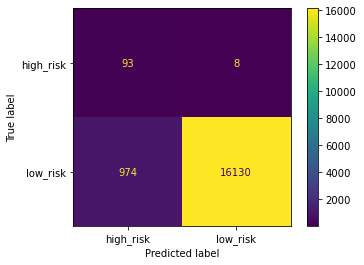

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = eec.classes_)
disp.plot()

In [25]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.9319231677611166

In [26]:
# Print the imbalanced classification report
# base              high_risk       0.81      0.21      1.00      0.33 
# random_oversample high_risk       0.03      0.82      0.84      0.06
# smote             high_risk       0.04      0.82      0.87      0.07
# undersample       high_risk       0.02      0.88      0.76      0.04
# smoteenn          high_risk       0.03      0.82      0.86      0.06
# brf               high_risk       0.03      0.63      0.88      0.06
imb_report = classification_report_imbalanced(y_test, y_pred)
print(imb_report)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.09      0.92      0.94      0.16      0.93      0.87       101
   low_risk       1.00      0.94      0.92      0.97      0.93      0.87     17104

avg / total       0.99      0.94      0.92      0.97      0.93      0.87     17205

